In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
# import pickle
from collections import Counter
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import classification_report
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.feature_selection import f_classif
# from itertools import combinations
# from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier

# import cupy as cp
# import cudf
from cuml.linear_model import LogisticRegression as cuMLLogisticRegression


print('NOVA_HOME is at', os.getenv('NOVA_HOME'))
sys.path.insert(1, os.getenv('NOVA_HOME'))
%load_ext autoreload
%autoreload 2

# from src.common.utils import load_config_file
# from src.embeddings.embeddings_utils import load_embeddings
# from src.analysis.analyzer_multiplex_markers import AnalyzerMultiplexMarkers
from utils import *

NOVA_HOME is at /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA


In [12]:
dataset_config = {
    "path_to_embeddings": "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen",
    "multiplexed": False,
    "config_fmt": "newNeuronsD8FigureConfig_UMAP1_B{batch}",
    "config_dir": "manuscript/manuscript_figures_data_config",
}

2025-08-19 11:59:17 INFO: [load_embeddings] multiplex=False
2025-08-19 11:59:17 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 11:59:17 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 11:59:17 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 11:59:21 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 11:59:22 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 11:59:23 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 11:59:23 INFO: [load_embeddings] embeddings shape: (141079, 192)
2025-08-19 11:59:23 INFO: [load_embeddings] labels shape: (141079,)
2025-08-19 11:59:23 INFO: [load_embeddings] example label: HNRNPA1_WT_Untreated
2025-08-19 11:59:23 INFO: [load_embeddings] paths shape: (141079,)
2025-08-19 11:59:23 INFO: [load_embeddings] multiplex=False
2025-08-19 11:5


=== Batch 1 ===
Train: (830450, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (196119, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
HNRNPA1_WT_Untreated: 24526
NONO_WT_Untreated: 20846
KIF5A_WT_Untreated: 20974
TOMM20_WT_Untreated: 21633
DAPI_WT_Untreated: 271498
DCP1A_WT_Untreated: 25887
LSM14A_WT_Untreated: 25124
ANXA11_WT_Untreated: 19584
PSD95_WT_Untreated: 21489
NCL_WT_Untreated: 25750
TDP43_WT_Untreated: 19716
Phalloidin_WT_Untreated: 22312
SQSTM1_WT_Untreated: 19138
SNCA_WT_Untreated: 11037
TIA1_WT_Untreated: 16541
GM130_WT_Untreated: 25126
Calreticulin_WT_Untreated: 25894
PEX14_WT_Untreated: 20145
PML_WT_Untreated: 19937
G3BP1_WT_Untreated: 9447
Tubulin_WT_Untreated: 24440
FUS_WT_Untreated: 19636
CLTC_WT_Untreated: 24225
NEMO_WT_Untreated: 24282
SON_WT_Untreated: 22340
PURA_WT_Untreated: 8626
mitotracker_WT_Untreated: 21876
LAMP1_WT_Untreated: 9717
FMRP_WT_U

2025-08-19 12:00:32 INFO: [load_embeddings] multiplex=False
2025-08-19 12:00:32 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:00:32 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 12:00:32 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4777
           1       0.95      0.96      0.96      5749
           2       0.97      0.98      0.97      6639
           3       1.00      1.00      1.00     63181
           4       0.96      0.95      0.96      5177
           5       0.97      0.97      0.97      2678
           6       0.99      0.98      0.98      6586
           7       0.98      0.92      0.95      2689
           8       0.98      0.99      0.99      6376
           9       0.98      0.99      0.98      6023
          10       0.95      0.97      0.96      4799
          11       0.97      0.89      0.93      1561
          12       0.97      0.99      0.98      6008
          13       1.00      0.99      0.99      6573
          14       0.99      0.99      0.99      5115
          15       0.90      0.98      0.93      4542
          16       0.99      0.99      0.99      4830
          17       0.99    

2025-08-19 12:00:37 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 12:00:39 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 12:00:41 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 12:00:41 INFO: [load_embeddings] embeddings shape: (196119, 192)
2025-08-19 12:00:41 INFO: [load_embeddings] labels shape: (196119,)
2025-08-19 12:00:41 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 12:00:41 INFO: [load_embeddings] paths shape: (196119,)
2025-08-19 12:00:41 INFO: [load_embeddings] multiplex=False
2025-08-19 12:00:41 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:00:41 INFO: [load_embeddings] input_folders = ['batch3']
2025-08-19 12:00:41 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 12:00:45 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD


=== Batch 2 ===
Train: (885490, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (141079, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
DAPI_WT_Untreated: 289648
PEX14_WT_Untreated: 21109
Calreticulin_WT_Untreated: 29143
TDP43_WT_Untreated: 20703
TIA1_WT_Untreated: 16825
TOMM20_WT_Untreated: 22332
HNRNPA1_WT_Untreated: 26333
KIF5A_WT_Untreated: 21917
LSM14A_WT_Untreated: 26961
SON_WT_Untreated: 22776
CLTC_WT_Untreated: 25663
GM130_WT_Untreated: 28274
NEMO_WT_Untreated: 25445
Tubulin_WT_Untreated: 25416
PURA_WT_Untreated: 10490
FMRP_WT_Untreated: 10444
DCP1A_WT_Untreated: 27007
NONO_WT_Untreated: 20846
PML_WT_Untreated: 21075
mitotracker_WT_Untreated: 22238
SQSTM1_WT_Untreated: 20119
ANXA11_WT_Untreated: 20574
Phalloidin_WT_Untreated: 23886
G3BP1_WT_Untreated: 11183
PSD95_WT_Untreated: 22936
FUS_WT_Untreated: 22609
SNCA_WT_Untreated: 10936
NCL_WT_Untreated: 28699
LAMP1_W

2025-08-19 12:01:33 INFO: [load_embeddings] multiplex=False
2025-08-19 12:01:33 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:01:33 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 12:01:33 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3787
           1       0.95      0.95      0.95      4311
           2       0.89      0.88      0.88      3390
           3       1.00      1.00      1.00     45031
           4       0.97      0.93      0.95      4057
           5       0.94      0.97      0.95       938
           6       0.99      0.91      0.95      3613
           7       0.91      0.96      0.94       953
           8       0.98      0.97      0.97      3228
           9       0.93      0.99      0.96      4216
          10       0.96      0.97      0.96      3856
          11       0.95      0.91      0.93      1375
          12       0.94      0.98      0.96      4171
          13       0.99      0.98      0.98      3624
          14       0.99      0.99      0.99      3952
          15       0.89      0.91      0.90      4542
          16       0.99      0.99      0.99      3866
          17       0.99    

2025-08-19 12:01:38 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 12:01:40 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 12:01:41 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 12:01:42 INFO: [load_embeddings] embeddings shape: (196119, 192)
2025-08-19 12:01:42 INFO: [load_embeddings] labels shape: (196119,)
2025-08-19 12:01:42 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 12:01:42 INFO: [load_embeddings] paths shape: (196119,)
2025-08-19 12:01:42 INFO: [load_embeddings] multiplex=False
2025-08-19 12:01:42 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:01:42 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 12:01:42 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 12:01:46 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD


=== Batch 3 ===
Train: (892233, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (134336, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
DAPI_WT_Untreated: 291501
PEX14_WT_Untreated: 21028
Calreticulin_WT_Untreated: 28546
TDP43_WT_Untreated: 20828
TIA1_WT_Untreated: 16892
TOMM20_WT_Untreated: 22202
HNRNPA1_WT_Untreated: 26716
KIF5A_WT_Untreated: 22810
LSM14A_WT_Untreated: 27335
SON_WT_Untreated: 23673
CLTC_WT_Untreated: 26550
GM130_WT_Untreated: 27676
NEMO_WT_Untreated: 25953
Tubulin_WT_Untreated: 26110
PURA_WT_Untreated: 9719
FMRP_WT_Untreated: 9628
DCP1A_WT_Untreated: 27588
NONO_WT_Untreated: 21731
PML_WT_Untreated: 21828
mitotracker_WT_Untreated: 22251
SQSTM1_WT_Untreated: 20505
ANXA11_WT_Untreated: 20494
Phalloidin_WT_Untreated: 24168
G3BP1_WT_Untreated: 10290
PSD95_WT_Untreated: 23714
FUS_WT_Untreated: 22519
SNCA_WT_Untreated: 10991
NCL_WT_Untreated: 28627
LAMP1_WT_

2025-08-19 12:02:32 INFO: [load_embeddings] multiplex=False
2025-08-19 12:02:32 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:02:32 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 12:02:32 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3867
           1       0.87      0.95      0.91      3424
           2       0.98      0.88      0.93      3987
           3       1.00      1.00      1.00     43178
           4       0.93      0.90      0.91      3476
           5       0.91      0.94      0.92      1754
           6       0.99      0.98      0.99      3703
           7       0.94      0.87      0.90      1846
           8       0.98      0.96      0.97      3826
           9       0.99      0.99      0.99      3833
          10       0.97      0.92      0.94      2963
          11       0.94      0.93      0.93       918
          12       0.94      0.97      0.95      3797
          13       0.99      0.99      0.99      3696
          14       0.97      0.98      0.98      3444
          15       0.96      0.76      0.85      3657
          16       0.97      0.99      0.98      3947
          17       0.99    

2025-08-19 12:02:38 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 12:02:40 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 12:02:41 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 12:02:42 INFO: [load_embeddings] embeddings shape: (196119, 192)
2025-08-19 12:02:42 INFO: [load_embeddings] labels shape: (196119,)
2025-08-19 12:02:42 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 12:02:42 INFO: [load_embeddings] paths shape: (196119,)
2025-08-19 12:02:42 INFO: [load_embeddings] multiplex=False
2025-08-19 12:02:42 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:02:42 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 12:02:42 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 12:02:46 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD


=== Batch 7 ===
Train: (837490, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (189079, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
DAPI_WT_Untreated: 270193
PEX14_WT_Untreated: 20964
Calreticulin_WT_Untreated: 26534
TDP43_WT_Untreated: 19874
TIA1_WT_Untreated: 17201
TOMM20_WT_Untreated: 21012
HNRNPA1_WT_Untreated: 25487
KIF5A_WT_Untreated: 20280
LSM14A_WT_Untreated: 25505
SON_WT_Untreated: 21753
CLTC_WT_Untreated: 23804
GM130_WT_Untreated: 25432
NEMO_WT_Untreated: 25027
Tubulin_WT_Untreated: 22723
PURA_WT_Untreated: 9113
FMRP_WT_Untreated: 9656
DCP1A_WT_Untreated: 25278
NONO_WT_Untreated: 20764
PML_WT_Untreated: 19880
mitotracker_WT_Untreated: 21332
SQSTM1_WT_Untreated: 18580
ANXA11_WT_Untreated: 19572
Phalloidin_WT_Untreated: 22211
G3BP1_WT_Untreated: 10348
PSD95_WT_Untreated: 22164
FUS_WT_Untreated: 26185
SNCA_WT_Untreated: 11279
NCL_WT_Untreated: 26158
LAMP1_WT_

2025-08-19 12:03:43 INFO: [load_embeddings] multiplex=False
2025-08-19 12:03:43 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:03:43 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 12:03:43 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4789
           1       0.70      0.95      0.80      6170
           2       0.80      0.75      0.77      5999
           3       1.00      1.00      1.00     64486
           4       0.96      0.82      0.88      5786
           5       0.95      0.94      0.95      1726
           6       0.00      0.00      0.00        37
           7       0.92      0.97      0.94      1788
           8       0.46      0.55      0.50      6070
           9       0.98      0.05      0.10      5062
          10       0.97      0.96      0.96      5493
          11       0.63      0.97      0.76      2097
          12       0.97      0.61      0.75      5627
          13       0.96      0.09      0.17      6165
          14       0.93      0.98      0.95      4370
          15       0.95      0.92      0.94      4624
          16       0.98      0.98      0.98      4011
          17       0.66    

2025-08-19 12:03:49 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 12:03:51 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 12:03:53 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 12:03:54 INFO: [load_embeddings] embeddings shape: (196119, 192)
2025-08-19 12:03:54 INFO: [load_embeddings] labels shape: (196119,)
2025-08-19 12:03:54 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 12:03:54 INFO: [load_embeddings] paths shape: (196119,)
2025-08-19 12:03:54 INFO: [load_embeddings] multiplex=False
2025-08-19 12:03:54 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:03:54 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 12:03:54 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 12:03:58 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD


=== Batch 8 ===
Train: (857265, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (169304, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
DAPI_WT_Untreated: 278916
PEX14_WT_Untreated: 20900
Calreticulin_WT_Untreated: 26659
TDP43_WT_Untreated: 20633
TIA1_WT_Untreated: 17450
TOMM20_WT_Untreated: 22224
HNRNPA1_WT_Untreated: 25041
KIF5A_WT_Untreated: 22126
LSM14A_WT_Untreated: 25648
SON_WT_Untreated: 22072
CLTC_WT_Untreated: 26025
GM130_WT_Untreated: 25865
NEMO_WT_Untreated: 23656
Tubulin_WT_Untreated: 24531
PURA_WT_Untreated: 9460
FMRP_WT_Untreated: 9449
DCP1A_WT_Untreated: 25323
NONO_WT_Untreated: 20689
PML_WT_Untreated: 21457
mitotracker_WT_Untreated: 22540
SQSTM1_WT_Untreated: 20396
ANXA11_WT_Untreated: 20291
Phalloidin_WT_Untreated: 23674
G3BP1_WT_Untreated: 9971
PSD95_WT_Untreated: 24965
FUS_WT_Untreated: 20373
SNCA_WT_Untreated: 11895
NCL_WT_Untreated: 26475
LAMP1_WT_U

2025-08-19 12:05:03 INFO: [load_embeddings] multiplex=False
2025-08-19 12:05:03 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:05:03 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 12:05:03 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4070
           1       0.94      0.73      0.82      3949
           2       0.94      0.90      0.92      5874
           3       1.00      1.00      1.00     55763
           4       0.96      0.97      0.97      5741
           5       0.85      0.97      0.90      1933
           6       0.97      0.56      0.71      5849
           7       0.93      0.96      0.95      2165
           8       0.98      0.69      0.81      5637
           9       0.67      0.99      0.80      5508
          10       0.94      0.97      0.96      3647
          11       0.97      0.91      0.94      2717
          12       0.94      0.97      0.96      5484
          13       0.93      0.98      0.95      5848
          14       0.99      1.00      0.99      5741
          15       0.93      0.94      0.94      4699
          16       0.89      0.98      0.93      4075
          17       0.93    

2025-08-19 12:05:08 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 12:05:10 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 12:05:12 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 12:05:13 INFO: [load_embeddings] embeddings shape: (196119, 192)
2025-08-19 12:05:13 INFO: [load_embeddings] labels shape: (196119,)
2025-08-19 12:05:13 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 12:05:13 INFO: [load_embeddings] paths shape: (196119,)
2025-08-19 12:05:13 INFO: [load_embeddings] multiplex=False
2025-08-19 12:05:13 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:05:13 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 12:05:13 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 12:05:17 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD


=== Batch 9 ===
Train: (829917, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (196652, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
DAPI_WT_Untreated: 271639
PEX14_WT_Untreated: 20729
Calreticulin_WT_Untreated: 25889
TDP43_WT_Untreated: 20241
TIA1_WT_Untreated: 17291
TOMM20_WT_Untreated: 20762
HNRNPA1_WT_Untreated: 24642
KIF5A_WT_Untreated: 20758
LSM14A_WT_Untreated: 25087
SON_WT_Untreated: 24021
CLTC_WT_Untreated: 23603
GM130_WT_Untreated: 25137
NEMO_WT_Untreated: 22622
Tubulin_WT_Untreated: 23345
PURA_WT_Untreated: 8972
FMRP_WT_Untreated: 9029
DCP1A_WT_Untreated: 24237
NONO_WT_Untreated: 22064
PML_WT_Untreated: 19983
mitotracker_WT_Untreated: 20963
SQSTM1_WT_Untreated: 19587
ANXA11_WT_Untreated: 21290
Phalloidin_WT_Untreated: 22464
G3BP1_WT_Untreated: 9441
PSD95_WT_Untreated: 20872
FUS_WT_Untreated: 19788
SNCA_WT_Untreated: 10887
NCL_WT_Untreated: 25906
LAMP1_WT_U

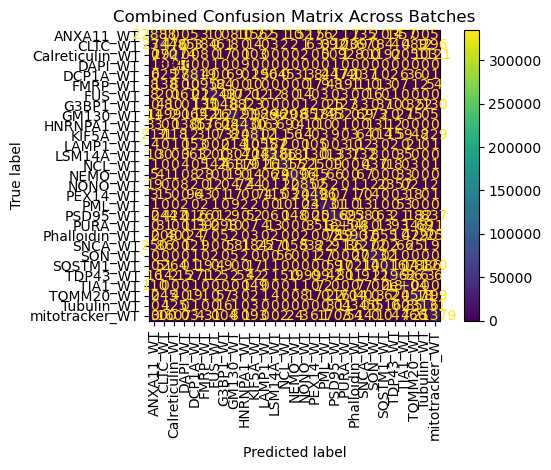


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
      ANXA11_WT_Untreated  0.997883     0.939535     0.999302 0.970324 0.998531
        CLTC_WT_Untreated  0.993837     0.915727     0.996186 0.878364 0.997462
Calreticulin_WT_Untreated  0.993824     0.899825     0.996901 0.904775 0.996722
        DAPI_WT_Untreated  0.999661     0.999964     0.999514 0.998997 0.999983
       DCP1A_WT_Untreated  0.996571     0.927730     0.998719 0.957633 0.997747
        FMRP_WT_Untreated  0.998845     0.962221     0.999255 0.935429 0.999576
         FUS_WT_Untreated  0.990330     0.848219     0.994055 0.789031 0.996014
       G3BP1_WT_Untreated  0.998591     0.946605     0.999213 0.935048 0.999361
       GM130_WT_Untreated  0.990985     0.848232     0.995504 0.856580 0.995197
     HNRNPA1_WT_Untreated  0.990137     0.799699     0.995978 0.859122 0.993870
       KIF5A_WT_Untreated  0.998070     0.962713     0.998981 0.960514 0.999040
       LAMP1

In [16]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3, 7, 8, 9],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)

2025-08-19 12:25:33 INFO: [load_embeddings] multiplex=False
2025-08-19 12:25:33 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:25:33 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 12:25:33 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


Loading all batches...


2025-08-19 12:25:39 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 12:25:41 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 12:25:42 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 12:25:42 INFO: [load_embeddings] embeddings shape: (196119, 192)
2025-08-19 12:25:42 INFO: [load_embeddings] labels shape: (196119,)
2025-08-19 12:25:42 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 12:25:42 INFO: [load_embeddings] paths shape: (196119,)
2025-08-19 12:25:42 INFO: [load_embeddings] multiplex=False
2025-08-19 12:25:42 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 12:25:42 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 12:25:42 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 12:25:46 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD

Batches loaded.
Training on Batches: ['2'], Testing on: ['1']

=== Batch 1 ===
Train: (141079, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (196119, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
HNRNPA1_WT_Untreated: 4216
NONO_WT_Untreated: 4542
KIF5A_WT_Untreated: 3856
TOMM20_WT_Untreated: 3701
DAPI_WT_Untreated: 45031
DCP1A_WT_Untreated: 4057
LSM14A_WT_Untreated: 4171
ANXA11_WT_Untreated: 3787
PSD95_WT_Untreated: 4292
NCL_WT_Untreated: 3624
TDP43_WT_Untreated: 3696
Phalloidin_WT_Untreated: 3857
SQSTM1_WT_Untreated: 3546
SNCA_WT_Untreated: 2469
TIA1_WT_Untreated: 3615
GM130_WT_Untreated: 3228
Calreticulin_WT_Untreated: 3390
PEX14_WT_Untreated: 3866
PML_WT_Untreated: 3757
G3BP1_WT_Untreated: 953
Tubulin_WT_Untreated: 3897
FUS_WT_Untreated: 3613
CLTC_WT_Untreated: 4311
NEMO_WT_Untreated: 3952
SON_WT_Untreated: 4551
PURA_WT_Untreated: 786
mitotracker_WT_Untreated: 4002

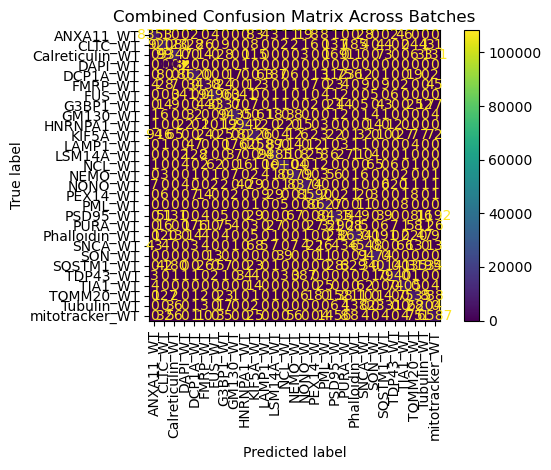


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
      ANXA11_WT_Untreated  0.998906     0.975362     0.999519 0.981436 0.999358
        CLTC_WT_Untreated  0.995558     0.915308     0.998025 0.934443 0.997397
Calreticulin_WT_Untreated  0.996130     0.931997     0.998096 0.937513 0.997916
        DAPI_WT_Untreated  0.998888     0.999991     0.998367 0.996556 0.999996
       DCP1A_WT_Untreated  0.996868     0.933507     0.998652 0.951225 0.998129
        FMRP_WT_Untreated  0.998906     0.950774     0.999427 0.947368 0.999466
         FUS_WT_Untreated  0.997070     0.931072     0.999128 0.970862 0.997853
       G3BP1_WT_Untreated  0.998188     0.916255     0.999083 0.916003 0.999086
       GM130_WT_Untreated  0.998766     0.982403     0.999246 0.974489 0.999484
     HNRNPA1_WT_Untreated  0.997838     0.970993     0.998679 0.958357 0.999091
       KIF5A_WT_Untreated  0.997444     0.950433     0.998682 0.949994 0.998694
       LAMP1

In [19]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2,],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)

2025-08-19 13:29:15 INFO: [load_embeddings] multiplex=False
2025-08-19 13:29:15 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 13:29:15 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 13:29:15 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


Loading all batches...


2025-08-19 13:29:20 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 13:29:21 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 13:29:23 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 13:29:23 INFO: [load_embeddings] embeddings shape: (196119, 192)
2025-08-19 13:29:23 INFO: [load_embeddings] labels shape: (196119,)
2025-08-19 13:29:23 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 13:29:23 INFO: [load_embeddings] paths shape: (196119,)
2025-08-19 13:29:23 INFO: [load_embeddings] multiplex=False
2025-08-19 13:29:23 INFO: [load_embeddings] experiment_type = neuronsDay8_new
2025-08-19 13:29:23 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 13:29:23 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 13:29:27 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD

Batches loaded.
Training on Batches: [1], Testing on: [2].

=== Batch [2] ===
Train: (196119, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (141079, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
DAPI_WT_Untreated: 63181
PEX14_WT_Untreated: 4830
Calreticulin_WT_Untreated: 6639
TDP43_WT_Untreated: 4683
TIA1_WT_Untreated: 3899
TOMM20_WT_Untreated: 4400
HNRNPA1_WT_Untreated: 6023
KIF5A_WT_Untreated: 4799
LSM14A_WT_Untreated: 6008
SON_WT_Untreated: 4987
CLTC_WT_Untreated: 5749
GM130_WT_Untreated: 6376
NEMO_WT_Untreated: 5115
Tubulin_WT_Untreated: 4873
PURA_WT_Untreated: 2650
FMRP_WT_Untreated: 2678
DCP1A_WT_Untreated: 5177
NONO_WT_Untreated: 4542
PML_WT_Untreated: 4895
mitotracker_WT_Untreated: 4364
SQSTM1_WT_Untreated: 4527
ANXA11_WT_Untreated: 4777
Phalloidin_WT_Untreated: 5431
G3BP1_WT_Untreated: 2689
PSD95_WT_Untreated: 5739
FUS_WT_Untreated: 6586
SNCA_WT_Untreated: 23


=== Batch [8] ===
Train: (196119, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Test: (169304, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
DAPI_WT_Untreated: 63181
PEX14_WT_Untreated: 4830
Calreticulin_WT_Untreated: 6639
TDP43_WT_Untreated: 4683
TIA1_WT_Untreated: 3899
TOMM20_WT_Untreated: 4400
HNRNPA1_WT_Untreated: 6023
KIF5A_WT_Untreated: 4799
LSM14A_WT_Untreated: 6008
SON_WT_Untreated: 4987
CLTC_WT_Untreated: 5749
GM130_WT_Untreated: 6376
NEMO_WT_Untreated: 5115
Tubulin_WT_Untreated: 4873
PURA_WT_Untreated: 2650
FMRP_WT_Untreated: 2678
DCP1A_WT_Untreated: 5177
NONO_WT_Untreated: 4542
PML_WT_Untreated: 4895
mitotracker_WT_Untreated: 4364
SQSTM1_WT_Untreated: 4527
ANXA11_WT_Untreated: 4777
Phalloidin_WT_Untreated: 5431
G3BP1_WT_Untreated: 2689
PSD95_WT_Untreated: 5739
FUS_WT_Untreated: 6586
SNCA_WT_Untreated: 2368
NCL_WT_Untreated: 6573
LAMP1_WT_Untreated: 1561
        

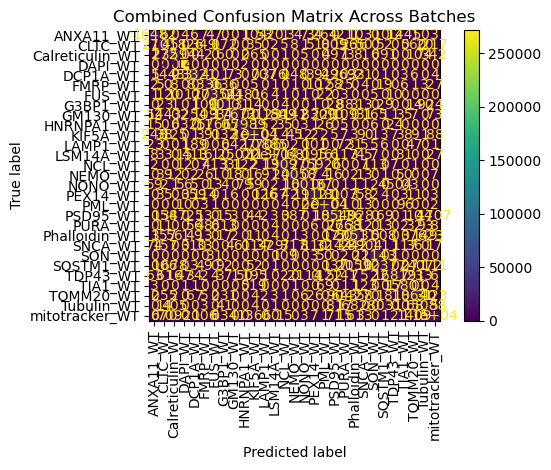


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
      ANXA11_WT_Untreated  0.995590     0.841605     0.999309 0.967140 0.996186
        CLTC_WT_Untreated  0.990982     0.867616     0.994689 0.830751 0.996017
Calreticulin_WT_Untreated  0.986111     0.911176     0.988523 0.718716 0.997116
        DAPI_WT_Untreated  0.997799     0.999993     0.996733 0.993319 0.999996
       DCP1A_WT_Untreated  0.994741     0.900877     0.997762 0.928310 0.996814
        FMRP_WT_Untreated  0.998233     0.957721     0.998663 0.883519 0.999552
         FUS_WT_Untreated  0.989690     0.883785     0.992255 0.734281 0.997172
       G3BP1_WT_Untreated  0.996801     0.954059     0.997292 0.802154 0.999470
       GM130_WT_Untreated  0.986983     0.703335     0.995833 0.840403 0.990791
     HNRNPA1_WT_Untreated  0.990398     0.733467     0.998217 0.926027 0.991940
       KIF5A_WT_Untreated  0.995528     0.956899     0.996529 0.877185 0.998881
       LAMP1

In [46]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3, 7, 8, 9],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_specific_batches = [1]
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3, 7, 8, 9],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)

In [2]:
X_train, y_train = load_batches([1])

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

f_scores, p_values = f_classif(X_train, y_encoded)

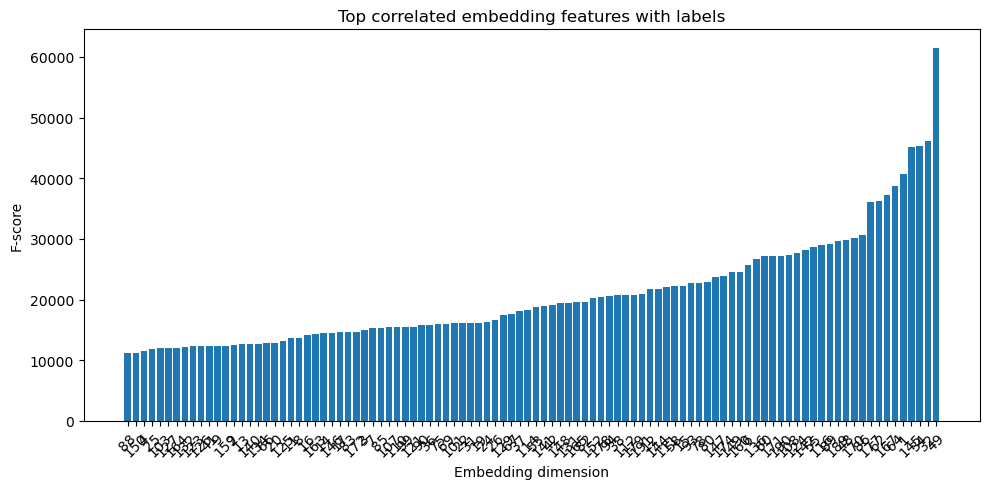

In [4]:
top_n = 100
top_idx = np.argsort(f_scores)[-top_n:]

plt.figure(figsize=(10, 5))
plt.bar(range(top_n), f_scores[top_idx])
plt.xticks(range(top_n), top_idx, rotation=45)
plt.ylabel("F-score")
plt.xlabel("Embedding dimension")
plt.title("Top correlated embedding features with labels")
plt.tight_layout()
plt.show()

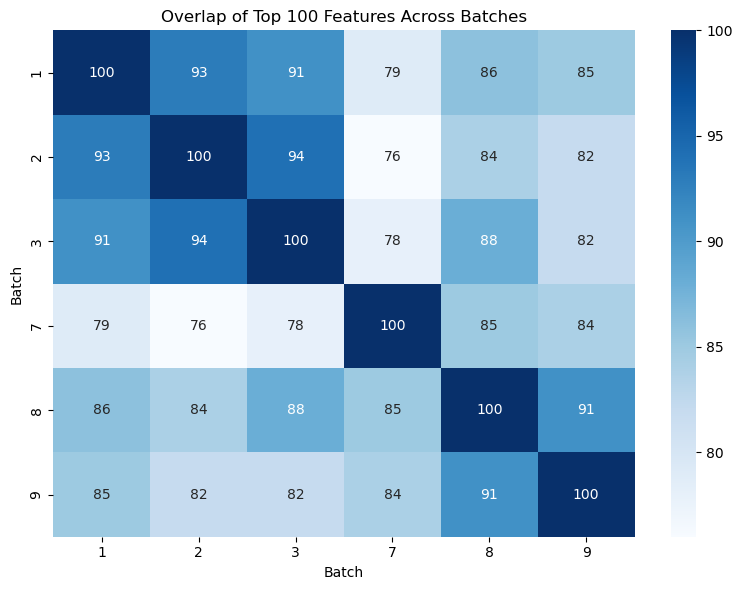

In [8]:
def get_top_features_for_batch(batch, top_k=200):
    X, y = load_batches([batch])
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    f_scores, _ = f_classif(X, y_encoded)
    top_features = np.argsort(f_scores)[-top_k:]
    return set(top_features)

batches = [1, 2, 3, 7, 8, 9,]
top_k = 100

# Get top features per batch
batch_feature_map = {batch: get_top_features_for_batch(batch, top_k) for batch in batches}

# Create overlap matrix
overlap_matrix = pd.DataFrame(index=batches, columns=batches, dtype=int)
for b1, b2 in combinations(batches, 2):
    overlap = len(batch_feature_map[b1] & batch_feature_map[b2])
    overlap_matrix.loc[b1, b2] = overlap
    overlap_matrix.loc[b2, b1] = overlap
for b in batches:
    overlap_matrix.loc[b, b] = top_k

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(overlap_matrix.astype(int), annot=True, fmt='d', cmap='Blues')
plt.title(f'Overlap of Top {top_k} Features Across Batches')
plt.xlabel("Batch")
plt.ylabel("Batch")
plt.tight_layout()
plt.show()

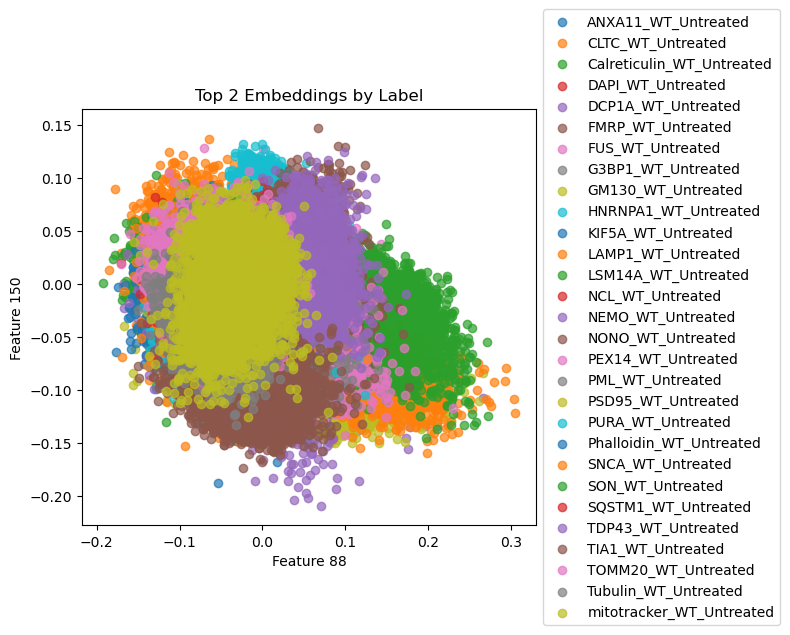

In [11]:
feat1, feat2 = top_idx[:2]
X_vis = X_train[:, [feat1, feat2]]

# Convert encoded labels back to original strings
labels_str = le.inverse_transform(y_encoded)

# Create a scatter plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels_str):
    idx = labels_str == label
    plt.scatter(X_vis[idx, 0], X_vis[idx, 1], label=label, alpha=0.7)

plt.xlabel(f'Feature {feat1}')
plt.ylabel(f'Feature {feat2}')
plt.title('Top 2 Embeddings by Label')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [6]:
from sklearn.decomposition import PCA
import umap

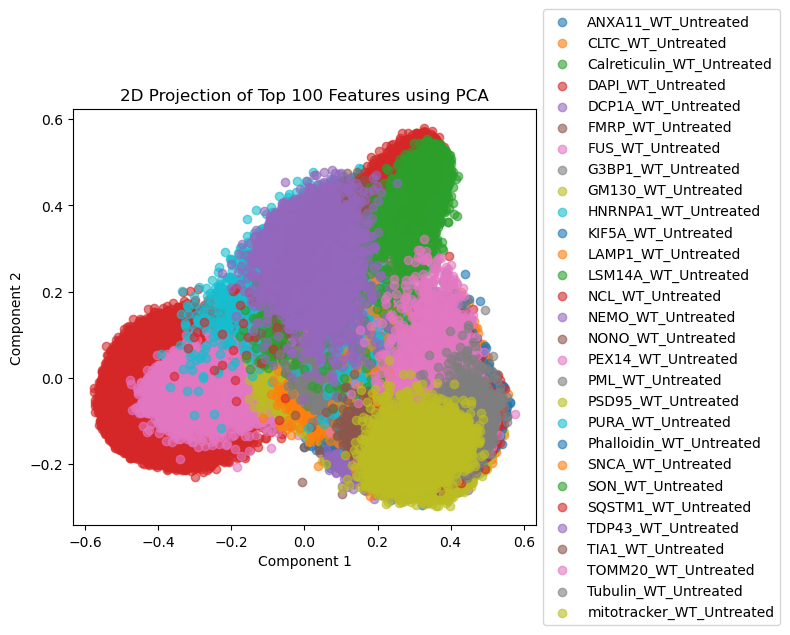

In [14]:
# 1. Select top 100 features from X_train
X_top = X_train[:, top_idx[:100]]

# 2. Encode labels to color
labels_str = le.inverse_transform(y_encoded)

# --- Option A: PCA ---
use_pca = True
if use_pca:
    reducer = PCA(n_components=2, random_state=42)
else:
    # --- Option B: UMAP ---
    reducer = umap.UMAP(n_components=2, random_state=42)

# 3. Reduce dimensions
X_embedded = reducer.fit_transform(X_top)

# 4. Plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels_str):
    idx = labels_str == label
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.6)

plt.title("2D Projection of Top 100 Features using " + ("PCA" if use_pca else "UMAP"))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


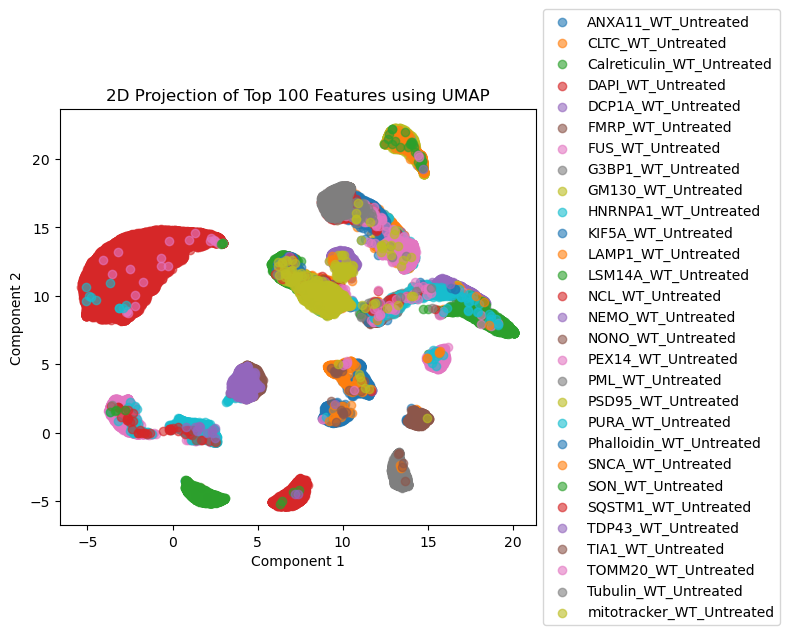

In [15]:
# 1. Select top 100 features from X_train
X_top = X_train[:, top_idx[:100]]

# 2. Encode labels to color
labels_str = le.inverse_transform(y_encoded)

# --- Option A: PCA ---
use_pca = False
if use_pca:
    reducer = PCA(n_components=2, random_state=42)
else:
    # --- Option B: UMAP ---
    reducer = umap.UMAP(n_components=2, random_state=42)

# 3. Reduce dimensions
X_embedded = reducer.fit_transform(X_top)

# 4. Plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels_str):
    idx = labels_str == label
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.6)

plt.title("2D Projection of Top 100 Features using " + ("PCA" if use_pca else "UMAP"))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

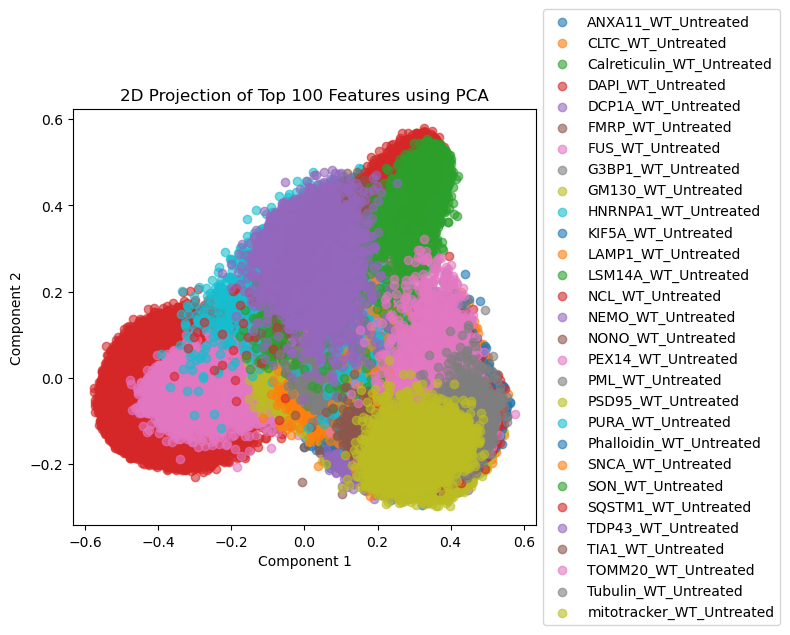

In [16]:
# 1. Select top 100 features from X_train
X_top = X_train[:, top_idx[:1000]]

# 2. Encode labels to color
labels_str = le.inverse_transform(y_encoded)

# --- Option A: PCA ---
use_pca = True
if use_pca:
    reducer = PCA(n_components=2, random_state=42)
else:
    # --- Option B: UMAP ---
    reducer = umap.UMAP(n_components=2, random_state=42)

# 3. Reduce dimensions
X_embedded = reducer.fit_transform(X_top)

# 4. Plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels_str):
    idx = labels_str == label
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.6)

plt.title("2D Projection of Top 100 Features using " + ("PCA" if use_pca else "UMAP"))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


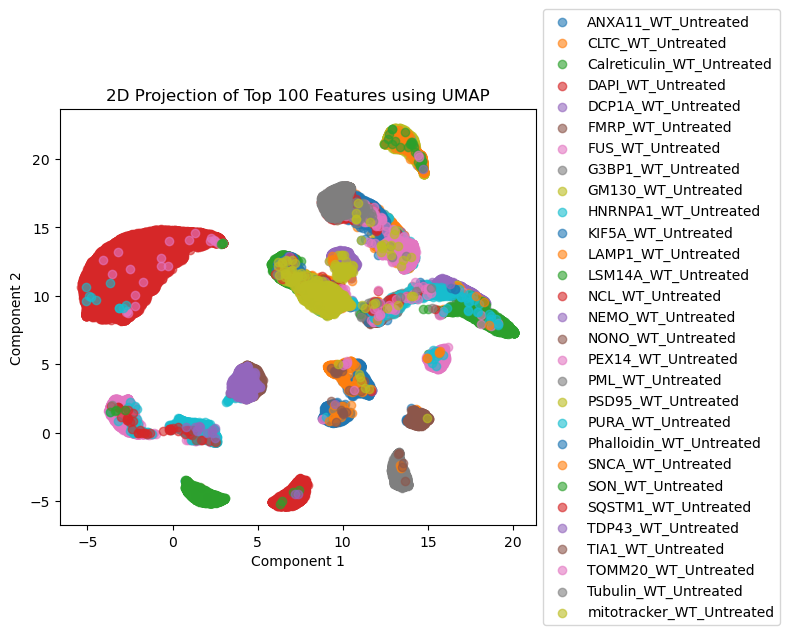

In [17]:
# 1. Select top 100 features from X_train
X_top = X_train[:, top_idx[:1000]]

# 2. Encode labels to color
labels_str = le.inverse_transform(y_encoded)

# --- Option A: PCA ---
use_pca = False
if use_pca:
    reducer = PCA(n_components=2, random_state=42)
else:
    # --- Option B: UMAP ---
    reducer = umap.UMAP(n_components=2, random_state=42)

# 3. Reduce dimensions
X_embedded = reducer.fit_transform(X_top)

# 4. Plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels_str):
    idx = labels_str == label
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.6)

plt.title("2D Projection of Top 100 Features using " + ("PCA" if use_pca else "UMAP"))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


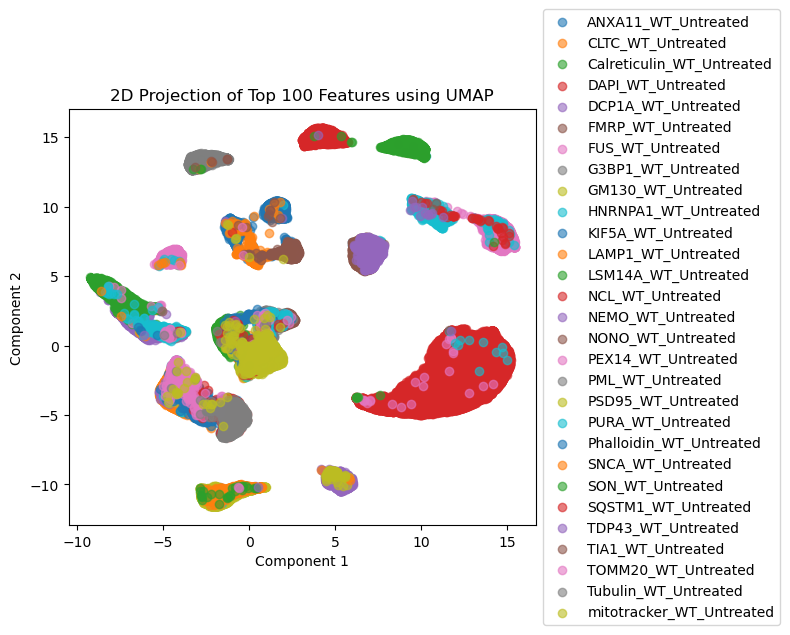

In [18]:
# 1. Select top 100 features from X_train
X_top = X_train

# 2. Encode labels to color
labels_str = le.inverse_transform(y_encoded)

# --- Option A: PCA ---
use_pca = False
if use_pca:
    reducer = PCA(n_components=2, random_state=42)
else:
    # --- Option B: UMAP ---
    reducer = umap.UMAP(n_components=2, random_state=42)

# 3. Reduce dimensions
X_embedded = reducer.fit_transform(X_top)

# 4. Plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels_str):
    idx = labels_str == label
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.6)

plt.title("2D Projection of Top 100 Features using " + ("PCA" if use_pca else "UMAP"))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


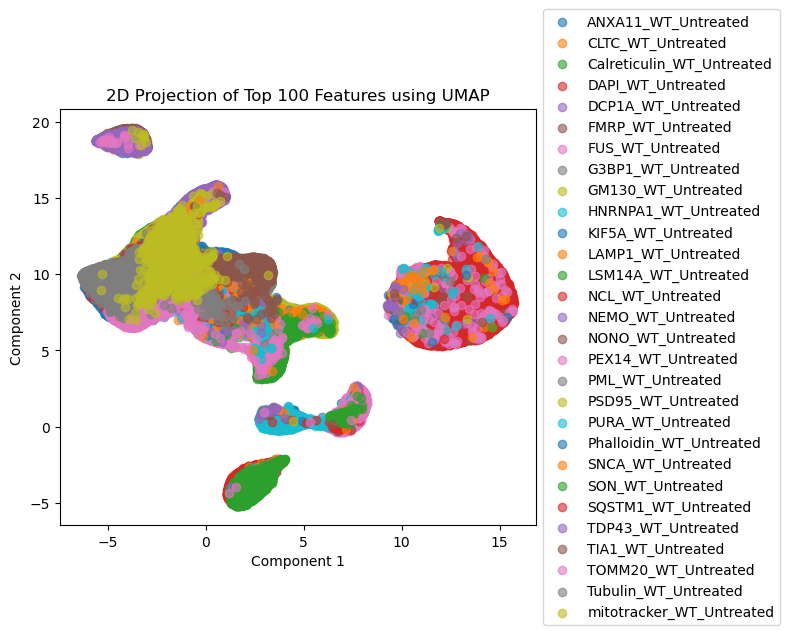

In [7]:
# 1. Select top 100 features from X_train
X_top = X_train[:, top_idx[:10]]

# 2. Encode labels to color
labels_str = le.inverse_transform(y_encoded)

# --- Option A: PCA ---
use_pca = False
if use_pca:
    reducer = PCA(n_components=2, random_state=42)
else:
    # --- Option B: UMAP ---
    reducer = umap.UMAP(n_components=2, random_state=42)

# 3. Reduce dimensions
X_embedded = reducer.fit_transform(X_top)

# 4. Plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels_str):
    idx = labels_str == label
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.6)

plt.title("2D Projection of Top 100 Features using " + ("PCA" if use_pca else "UMAP"))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()